<a href="https://colab.research.google.com/github/jordan-dsouza/Projects/blob/main/Loan_approve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
sns.set()

#**Raw data:**

In [ ]:
raw_csv = pd.read_csv("loan_approval_dataset.csv")
raw_csv.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [ ]:
raw_csv.columns.values

array(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype=object)

In [ ]:
raw_csv.columns = raw_csv.columns.str.replace(" ","")

In [ ]:
#Number of null values:
raw_csv.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
#Number of duplicated rows:
raw_csv[raw_csv["loan_id"].duplicated(keep = False) == True].sort_values(["loan_id"])

Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []

In [ ]:
raw_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
raw_csv.describe(include = "all")

loan_id  no_of_dependents  education self_employed  income_annum  \
count   4269.000000       4269.000000       4269          4269  4.269000e+03   
unique          NaN               NaN          2             2           NaN   
top             NaN               NaN   Graduate           Yes           NaN   
freq            NaN               NaN       2144          2150           NaN   
mean    2135.000000          2.498712        NaN           NaN  5.059124e+06   
std     1232.498479          1.695910        NaN           NaN  2.806840e+06   
min        1.000000          0.000000        NaN           NaN  2.000000e+05   
25%     1068.000000          1.000000        NaN           NaN  2.700000e+06   
50%     2135.000000          3.000000        NaN           NaN  5.100000e+06   
75%     3202.000000          4.000000        NaN           NaN  7.500000e+06   
max     4269.000000          5.000000        NaN           NaN  9.900000e+06   

         loan_amount    loan_term  cibil_score  residential_assets_value  \
count   4.269000e+03  4269.000000  4269.000000              4.269000e+03   
unique           NaN          NaN          NaN                       NaN   
top              NaN          NaN          NaN                       NaN   
freq             NaN          NaN          NaN                       NaN   
mean    1.513345e+07    10.900445   599.936051              7.472617e+06   
std     9.043363e+06     5.709187   172.430401              6.503637e+06   
min     3.000000e+05     2.000000   300.000000             -1.000000e+05   
25%     7.700000e+06     6.000000   453.000000              2.200000e+06   
50%     1.450000e+07    10.000000   600.000000              5.600000e+06   
75%     2.150000e+07    16.000000   748.000000              1.130000e+07   
max     3.950000e+07    20.000000   900.000000              2.910000e+07   

        commercial_assets_value  luxury_assets_value  bank_asset_value  \
count              4.269000e+03         4.269000e+03      4.269000e+03   
unique                      NaN                  NaN               NaN   
top                         NaN                  NaN               NaN   
freq                        NaN                  NaN               NaN   
mean               4.973155e+06         1.512631e+07      4.976692e+06   
std                4.388966e+06         9.103754e+06      3.250185e+06   
min                0.000000e+00         3.000000e+05      0.000000e+00   
25%                1.300000e+06         7.500000e+06      2.300000e+06   
50%                3.700000e+06         1.460000e+07      4.600000e+06   
75%                7.600000e+06         2.170000e+07      7.100000e+06   
max                1.940000e+07         3.920000e+07      1.470000e+07   

       loan_status  
count         4269  
unique           2  
top       Approved  
freq          2656  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

In [ ]:
raw_csv.shape

(4269, 13)

In [ ]:
raw_csv.columns.values

array(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype=object)

#Notes:
1. There are no null values.
2. There are no duplicated values.
3. "no_of_dependents", "education", "self employed" and "loan_status" are categorical in nature.
4. 2656 rows have " Approved" loan status with a whitespace before "Approved and "Rejected".

In [ ]:
df = raw_csv.drop(["loan_id"], axis = 1)

In [ ]:
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

#**EDA:**

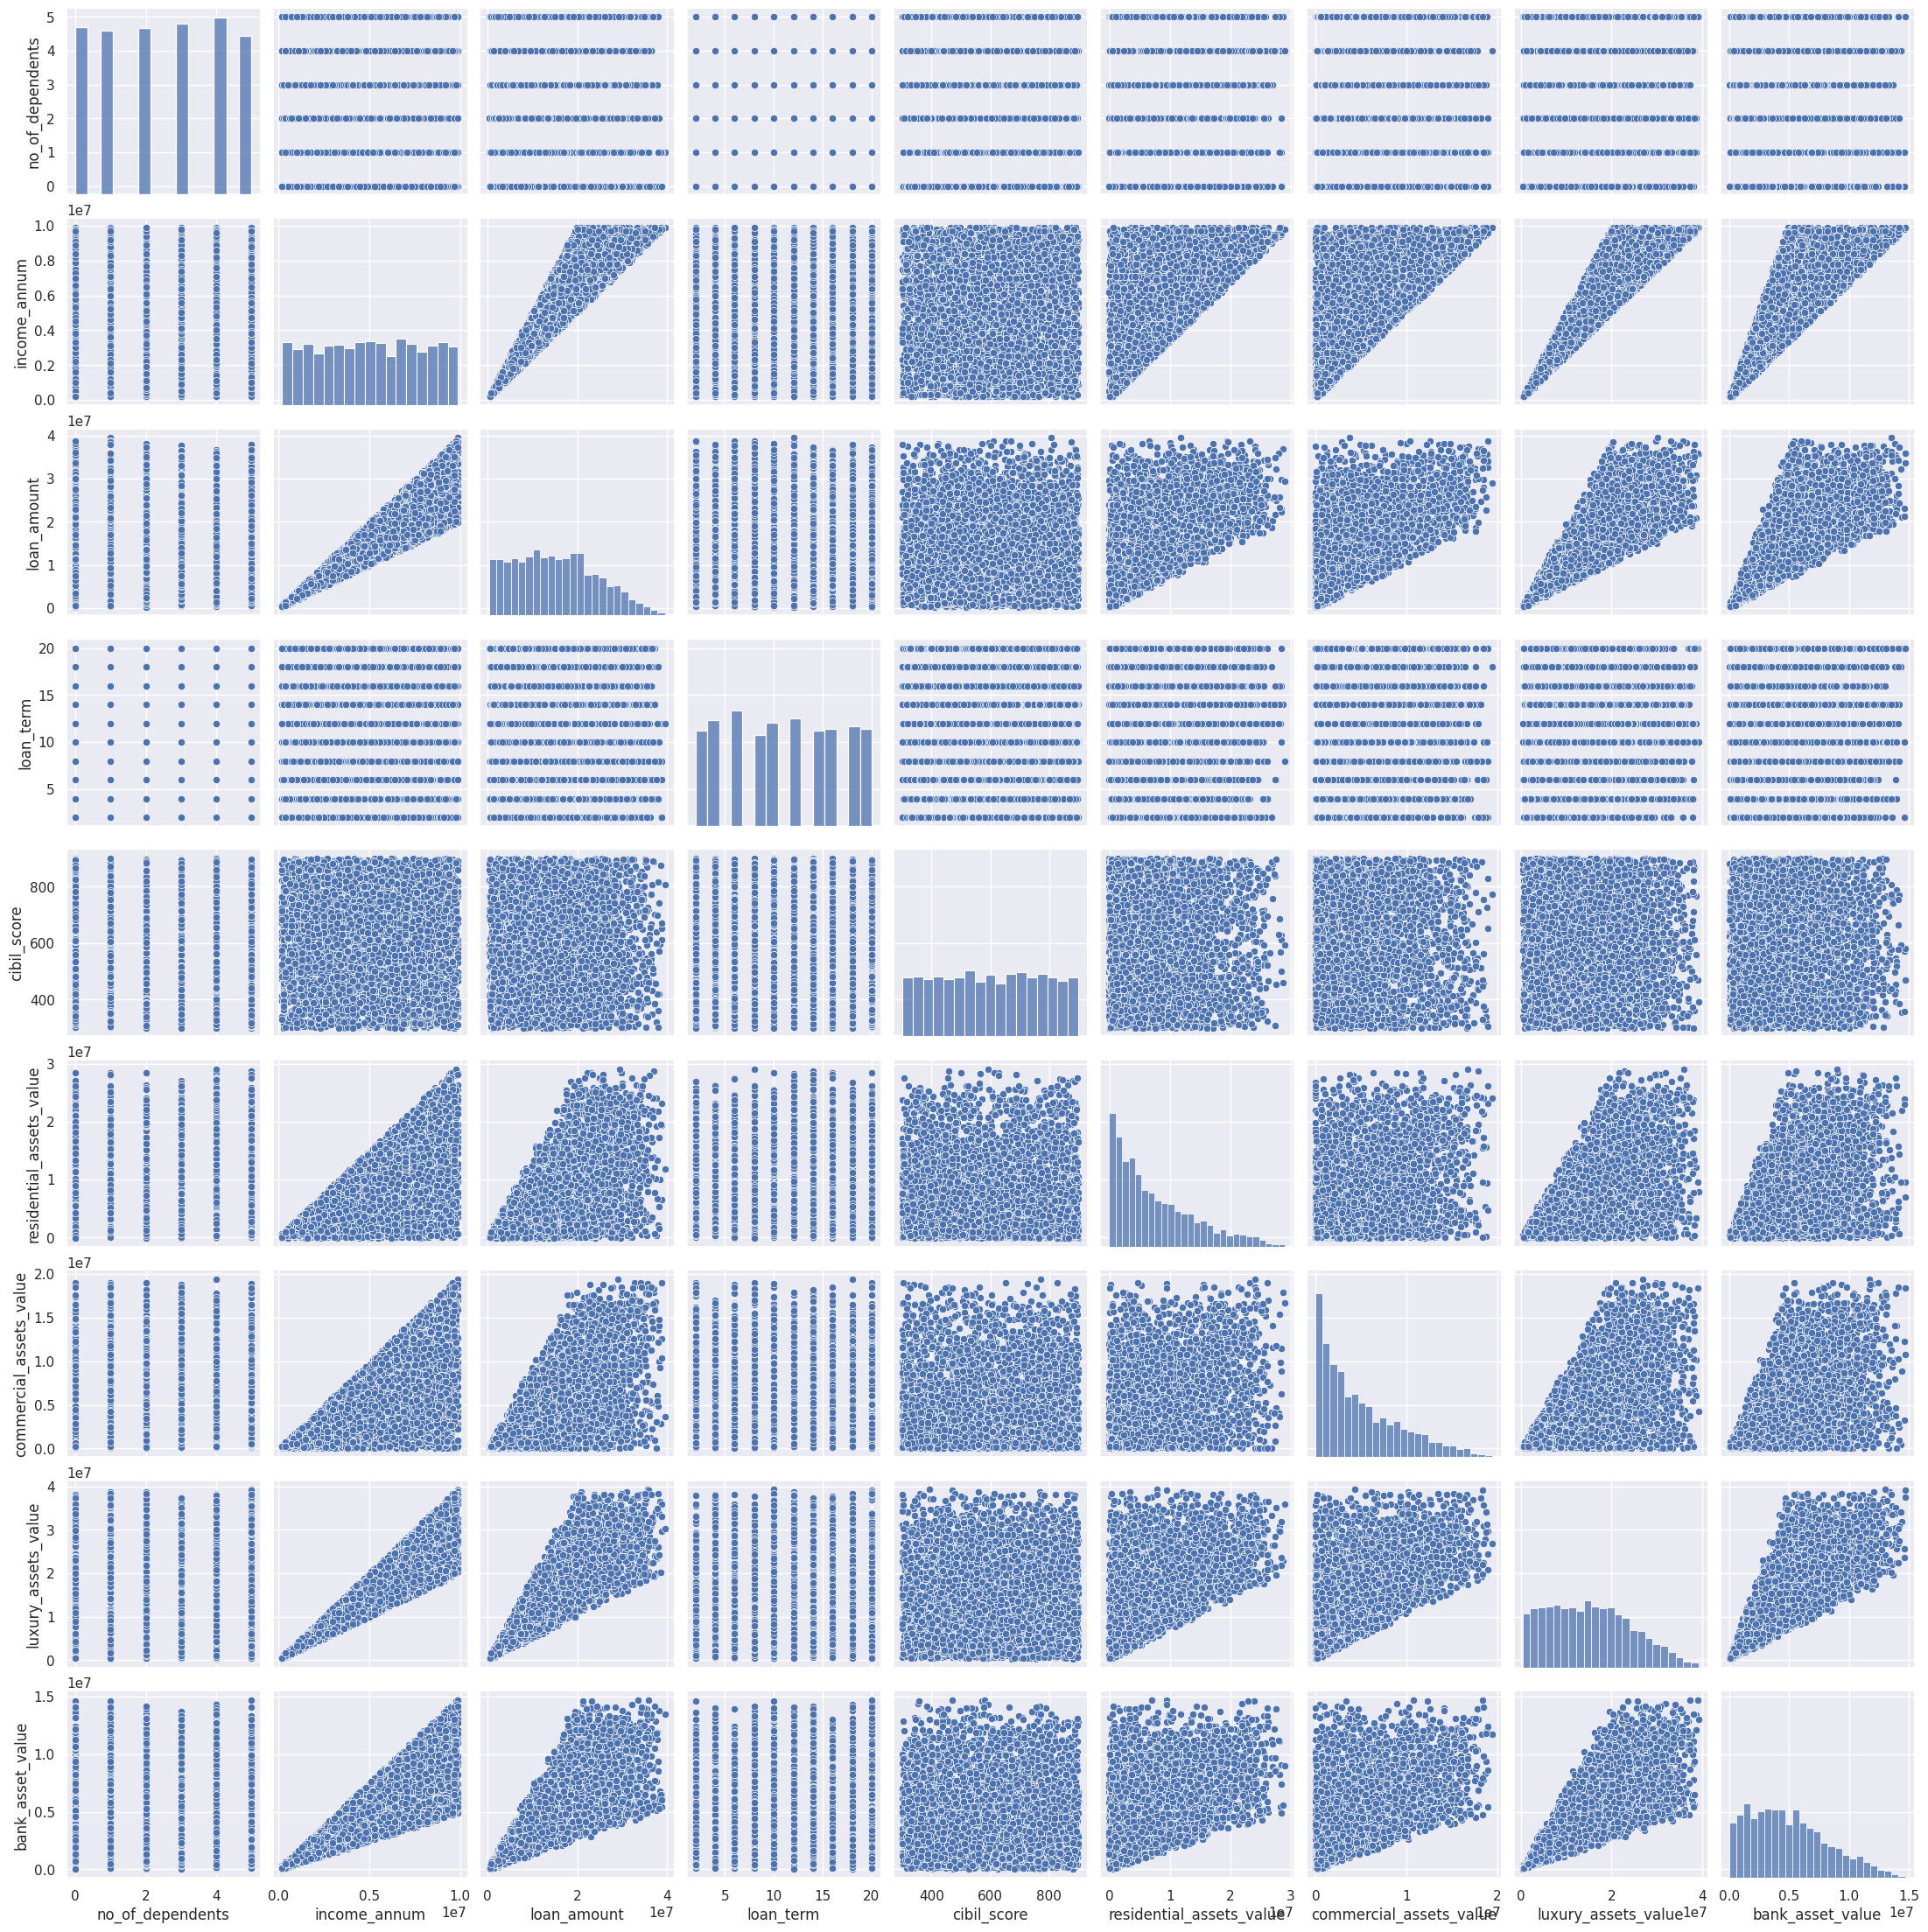

In [ ]:
sns.pairplot(df)

##1. Loan amount

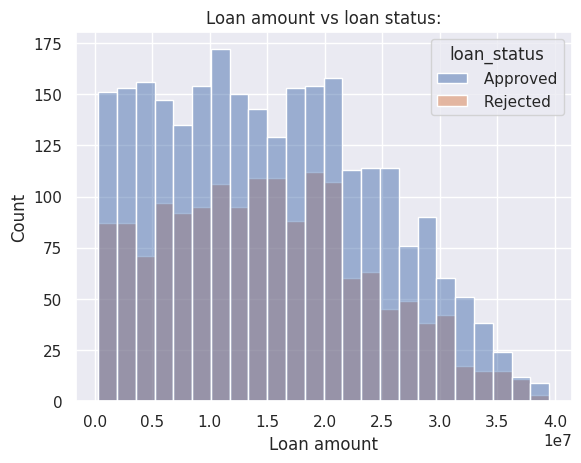

In [ ]:
#Loan amount vs status:
sns.histplot(x = "loan_amount", hue = "loan_status", data = df)
plt.xlabel("Loan amount")
plt.title("Loan amount vs loan status:")
plt.show()

Both approved and rejected loans have similar trends.

The below plots are made after referring to the above pairplot.

##2. Income amount and loan:

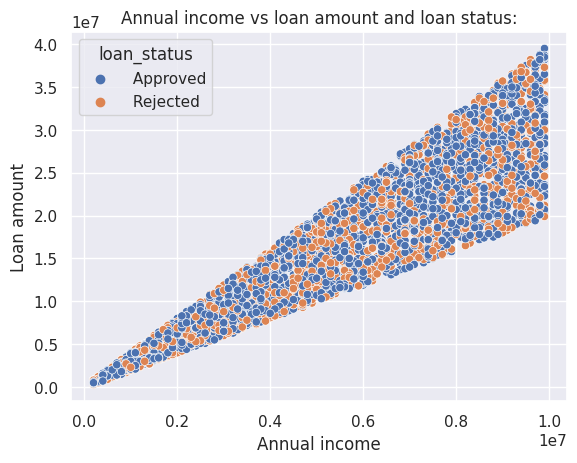

In [ ]:
#Income amount vs loan amount and status:
sns.scatterplot(y = "loan_amount", x = "income_annum", hue = "loan_status", data = df)
plt.title("Annual income vs loan amount and loan status:")
plt.ylabel("Loan amount")
plt.xlabel("Annual income")
plt.show()

Note:
1. When annual income increases, loan amount tends to increase.
2. Low income = low loan amount range.
3. High income = high loan income range.
4. Relation between loan status and income is not clear.

In [ ]:
#Highest income AND loan approved:
df.loc[(df["income_annum"] == df["income_annum"].max()) & (df["loan_status"] == " Approved")]

no_of_dependents      education self_employed  income_annum  \
300                  0   Not Graduate           Yes       9900000   
360                  1   Not Graduate           Yes       9900000   
509                  1       Graduate           Yes       9900000   
530                  5       Graduate           Yes       9900000   
714                  4   Not Graduate            No       9900000   
781                  3   Not Graduate           Yes       9900000   
1027                 1   Not Graduate            No       9900000   
1131                 0   Not Graduate            No       9900000   
1308                 1   Not Graduate           Yes       9900000   
1625                 2   Not Graduate           Yes       9900000   
1768                 4   Not Graduate            No       9900000   
1805                 5   Not Graduate            No       9900000   
1965                 0   Not Graduate            No       9900000   
2004                 2   Not Graduate            No       9900000   
2205                 1   Not Graduate           Yes       9900000   
2373                 4       Graduate            No       9900000   
2628                 3       Graduate            No       9900000   
2730                 2       Graduate           Yes       9900000   
2914                 3   Not Graduate           Yes       9900000   
3163                 3   Not Graduate           Yes       9900000   
3234                 1   Not Graduate            No       9900000   
3504                 5       Graduate           Yes       9900000   
3529                 1   Not Graduate            No       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
300      38200000          6          573                  17200000   
360      38400000         12          596                  10000000   
509      39500000         12          808                  11800000   
530      31800000         18          817                  23400000   
714      22700000         12          567                  28300000   
781      20400000          4          865                  26300000   
1027     38700000          6          670                  19400000   
1131     27000000         16          566                   3500000   
1308     38500000          2          875                  19600000   
1625     33200000          4          465                  26300000   
1768     29100000         18          772                  24100000   
1805     33600000         20          580                   7000000   
1965     22300000         20          613                  28400000   
2004     31600000         16          892                   4200000   
2205     30900000         20          559                  12100000   
2373     28400000         10          763                  23700000   
2628     23600000         18          557                  18300000   
2730     33400000         14          783                  16600000   
2914     36500000         16          562                  17300000   
3163     26700000         10          550                  22200000   
3234     23400000         16          687                  28200000   
3504     25900000          4          860                   7800000   
3529     20700000         20          821                  12700000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
300                  10000000             20100000           5900000   
360                   9300000             36500000           6800000   
509                   3700000             30200000          13500000   
530                    700000             32600000          11500000   
714                   9900000             29700000           5400000   
781                   3600000             36500000          12800000   
1027                 12600000             35800000           6500000   
1131                 17300000             36900000          11500000

##3. Credit score and loan:

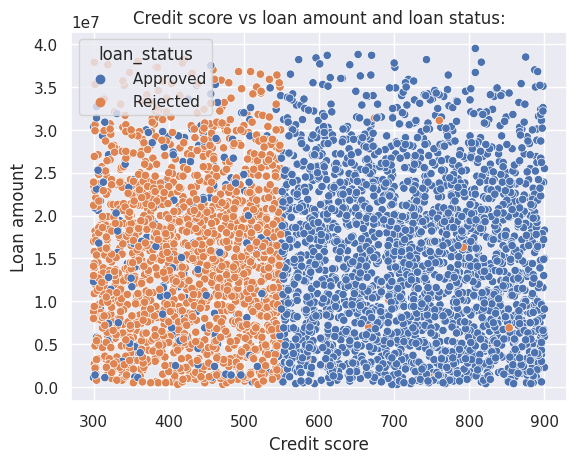

In [ ]:
sns.scatterplot(y = "loan_amount", x = "cibil_score", hue = "loan_status", data = df)
plt.title("Credit score vs loan amount and loan status:")
plt.ylabel("Loan amount")
plt.xlabel("Credit score")
plt.show()

Notes:
1. Most loans with poor credit score less than 600 were rejected.
2. A few clients with high credit score also had loans rejected.
3. Loan amount and credit score are highly related.

FICO Score Range (300-850):

300 - 579: Poor

580 - 669: Fair

670 - 739: Good

740 - 799: Very Good

800 - 850: Exceptional


In [ ]:
#Very good credit score and still rejected:
df.loc[(df["cibil_score"] > 740) & (df["loan_status"] == " Rejected")].sort_values(["cibil_score"])

no_of_dependents      education self_employed  income_annum  \
1446                 1       Graduate            No        300000   
4099                 3       Graduate            No       8700000   
236                  3       Graduate           Yes        900000   
3213                 1   Not Graduate           Yes       4300000   
911                  0       Graduate           Yes       1300000   
3527                 0       Graduate            No       1800000   
559                  2       Graduate           Yes        200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1446      1200000         18          747                    100000   
4099     31100000         16          760                    400000   
236       3500000          4          770                    700000   
3213     16300000         14          792                    400000   
911       4800000          4          835                    500000   
3527      6900000         10          853                    900000   
559        500000          6          885                   -100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1446                        0               700000            200000   
4099                  1800000             19300000           4800000   
236                         0              2000000            600000   
3213                   400000             10200000           4000000   
911                    100000              3300000            800000   
3527                   400000              3700000           1700000   
559                         0               300000            200000   

     loan_status  
1446    Rejected  
4099    Rejected  
236     Rejected  
3213    Rejected  
911     Rejected  
3527    Rejected  
559     Rejected

##4. Asset values:

Notes:
1. Residential asset value: The estimated or appraised value of a residential property, such as a house or apartment.
2. Commercial asset value: The estimated or appraised value of a commercial property, which is a property used for business or income-generating purposes rather than residential living.
3. Luxury asset value: The estimated or appraised value of high-end or luxury items, possessions, or investments that are considered to be of superior quality, exclusivity, and desirability.
4. Bank asset value: The total value of assets held by a bank, which includes various types of financial instruments, investments, loans, and other holdings that the bank owns or manages.

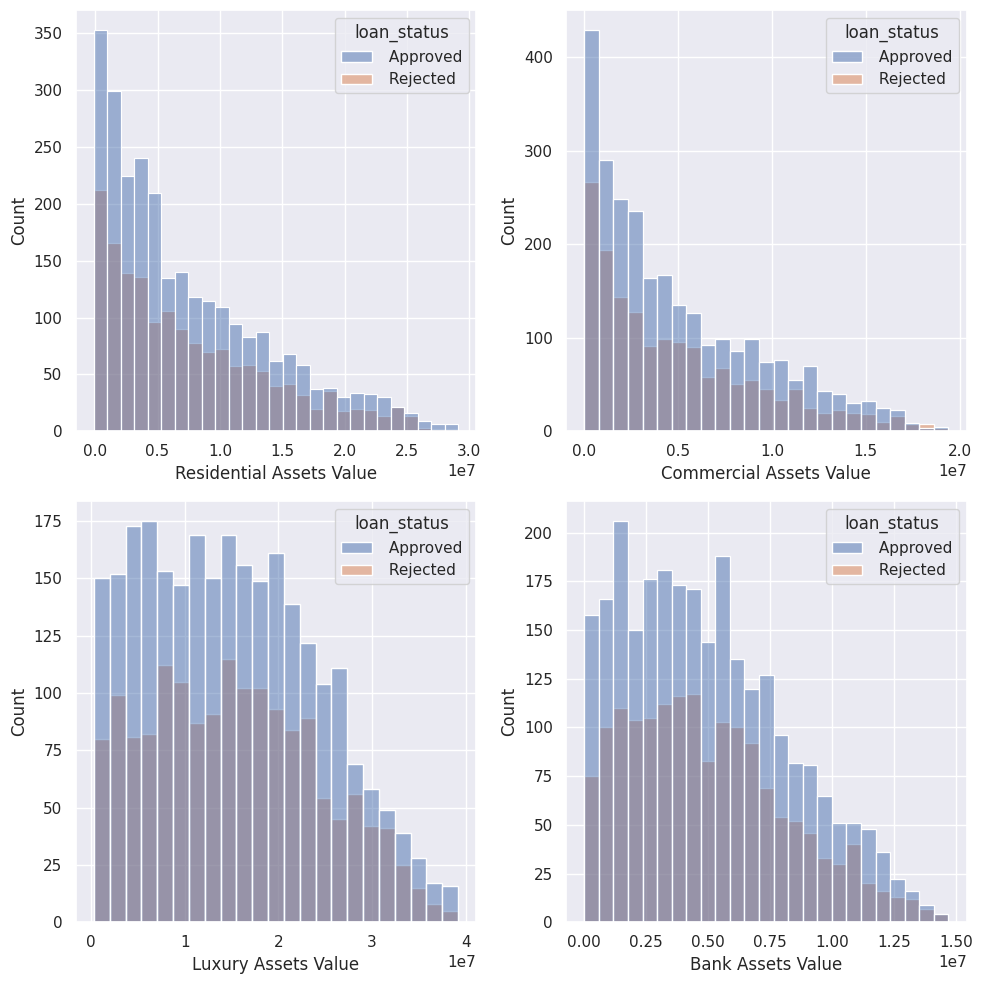

In [ ]:
fig,axes = plt.subplots(2, 2, figsize = (10, 10))
#plt.title("Residential, luxury, commercial and bank asset values histograms:")
sns.histplot(df, x = "residential_assets_value", hue = "loan_status", ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = "luxury_assets_value", hue = "loan_status", ax = axes[1,0])
axes[1,0].set_xlabel("Luxury Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = "commercial_assets_value", hue = "loan_status", ax = axes[0,1])
axes[0,1].set_xlabel("Commercial Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = "bank_asset_value", hue = "loan_status", ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

For all 4 assets values, "Approved" and "Rejected" show similar trends.

<ipython-input-20-2590a091cf03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Reds")


<Axes: >

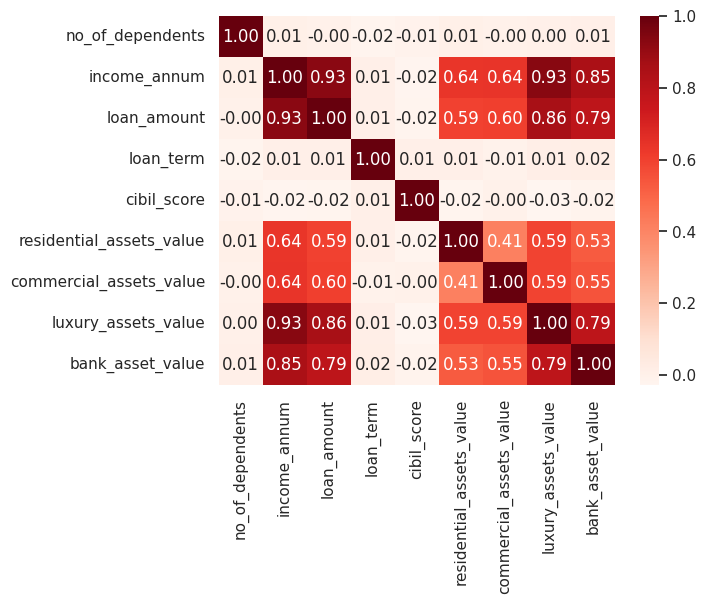

In [ ]:
#Checking correlation:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Reds")

Notes:
1. Luxury and bank assets value have strong correlation with annual income.
2. Residential and commercial assets value have a medium correlation with annual income.
3. Loan term doesn't show any correlation.

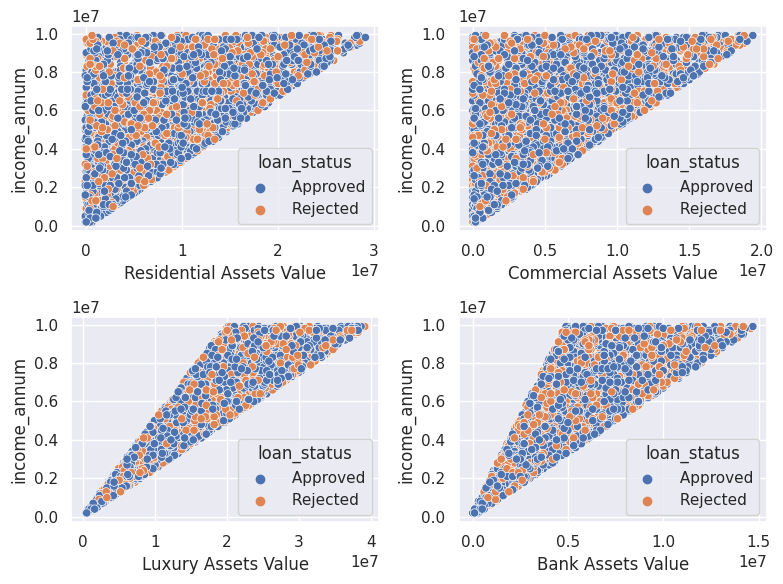

In [ ]:
#Asset values vs income and loan status:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(df, x = "residential_assets_value", y= "income_annum", hue = "loan_status", ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(df, x = "luxury_assets_value", y= "income_annum", hue = "loan_status", ax = axes[1,0])
axes[1,0].set_xlabel("Luxury Assets Value")

sns.scatterplot(df, x = "commercial_assets_value", y= "income_annum", hue = "loan_status", ax = axes[0,1])
axes[0,1].set_xlabel("Commercial Assets Value")

sns.scatterplot(df, x = "bank_asset_value", y= "income_annum", hue = "loan_status", ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()

Notes:
1. In case of residential and commercial assets, high income may correspond to low or high asset values.
2. In case of luxury and bank assets, high income have higher asset values.
3. Loan status doesn't show any specific trend.

##5. Loan term vs loan status:

Notes:

1. The "loan term" refers to the duration or length of time over which a borrower agrees to repay a loan.
2. Loan term vs status crosstab can be made since status has categorical values.

In [ ]:
#Columns have categorical value:
loan_tab = pd.crosstab(columns = df["loan_status"], index = df["loan_term"])
loan_tab["Total"] = loan_tab[" Approved"] + loan_tab[" Rejected"]
loan_tab["Approved%"] = (loan_tab[" Approved"] / loan_tab["Total"])*100
loan_tab["Rejected%"] = 100 - loan_tab["Approved%"]
loan_tab

loan_status   Approved   Rejected  Total  Approved%  Rejected%
loan_term                                                     
2                  315         89    404  77.970297  22.029703
4                  366         81    447  81.879195  18.120805
6                  282        208    490  57.551020  42.448980
8                  220        166    386  56.994819  43.005181
10                 229        207    436  52.522936  47.477064
12                 276        180    456  60.526316  39.473684
14                 239        166    405  59.012346  40.987654
16                 236        176    412  57.281553  42.718447
18                 257        165    422  60.900474  39.099526
20                 236        175    411  57.420925  42.579075

<Figure size 1200x600 with 0 Axes>

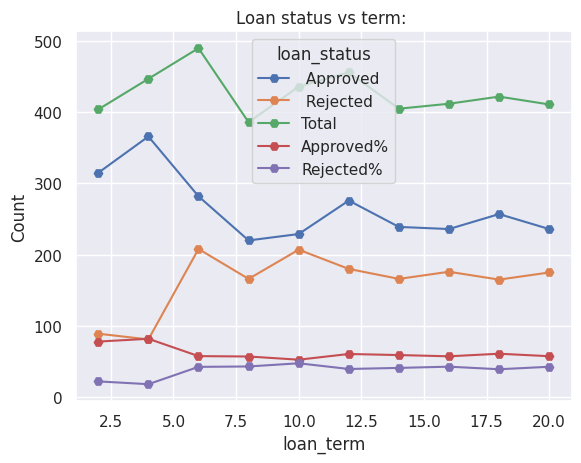

In [ ]:
plt.figure(figsize = (12, 6))
loan_tab.plot.line(marker = "H")
plt.title("Loan status vs term: ")
plt.ylabel("Count")
plt.show()

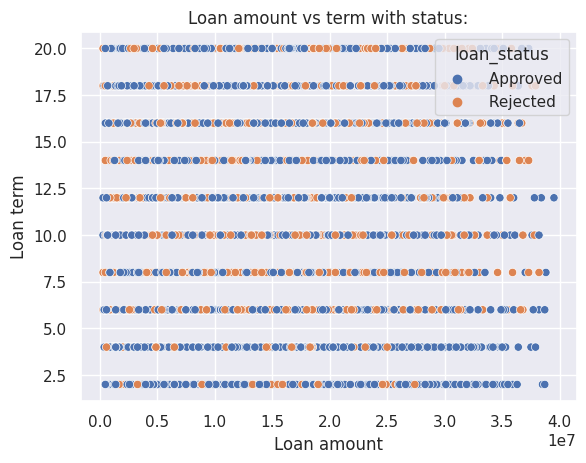

In [ ]:
#Loan amount vs loan term with status:
sns.scatterplot(x = "loan_amount", y = "loan_term", hue = "loan_status", data = df)
plt.title("Loan amount vs term with status:")
plt.xlabel("Loan amount")
plt.ylabel("Loan term")
plt.show()

Notes:
1. 4 year loan term gets most chance for approval.
2. Most loans have a 6 year term.
3. For 10 year term, chance of approval and rejection is almost same.


##6. Education:

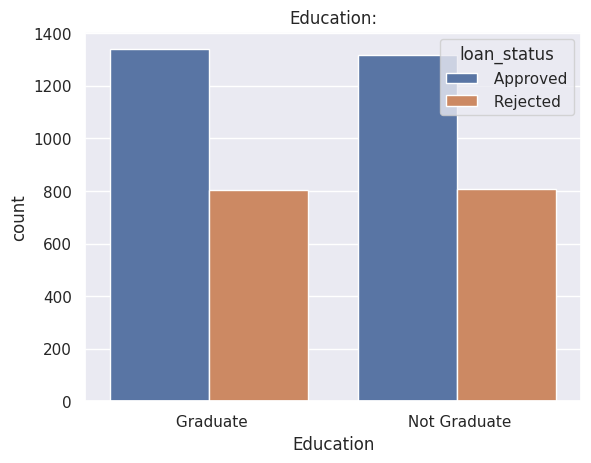

In [ ]:
#Education countplot:
sns.countplot(data = df, x = "education", hue = "loan_status")
plt.title("Education:")
plt.xlabel("Education")
plt.show()

In [ ]:
education_df = df.groupby(["education"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    meam_loan_amount=("loan_amount", "mean"),
    mean_credit_score = ("cibil_score", "mean"),
    mean_loan_term = ("loan_term", "mean"),
    mean_residential_value = ("residential_assets_value", "mean"),
    mean_commerical_value = ("commercial_assets_value", "mean"),
    mean_luxury_value = ("luxury_assets_value", "mean"),
    mean_bank_value = ("bank_asset_value", "mean")
    ).round(3).reset_index(drop=True)

education_df

education  count  median_annual_income  meam_loan_amount  \
0       Graduate   2144             5100000.0      1.522915e+07   
1   Not Graduate   2125             5000000.0      1.503689e+07   

   mean_credit_score  mean_loan_term  mean_residential_value  \
0            599.138          10.853             7543376.866   
1            600.741          10.949             7401223.529   

   mean_commerical_value  mean_luxury_value  mean_bank_value  
0            4943610.075       1.523932e+07      5007182.836  
1            5002964.706       1.501228e+07      4945929.412

##7. Self Employed:


In [ ]:
selfemp_df = df.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    meam_loan_amount=("loan_amount", "mean"),
    mean_credit_score = ("cibil_score", "mean"),
    mean_loan_term = ("loan_term", "mean"),
    mean_residential_value = ("residential_assets_value", "mean"),
    mean_commerical_value = ("commercial_assets_value", "mean"),
    mean_luxury_value = ("luxury_assets_value", "mean"),
    mean_bank_value = ("bank_asset_value", "mean")
    ).round(3).reset_index(drop=True)

selfemp_df

self_employed  count  median_annual_income  meam_loan_amount  \
0            No   2119             5100000.0      1.512025e+07   
1           Yes   2150             5100000.0      1.514647e+07   

   mean_credit_score  mean_loan_term  mean_residential_value  \
0            600.781          10.877             7432373.761   
1            599.103          10.924             7512279.070   

   mean_commerical_value  mean_luxury_value  mean_bank_value  
0            5052713.544       1.508584e+07      4977394.998  
1            4894744.186       1.516619e+07      4976000.000

Notes:

"Education" and "self employed" shows no actual relation with other variables.

##8. No. of dependents:

Text(0.5, 1.0, 'Number of dependents:')

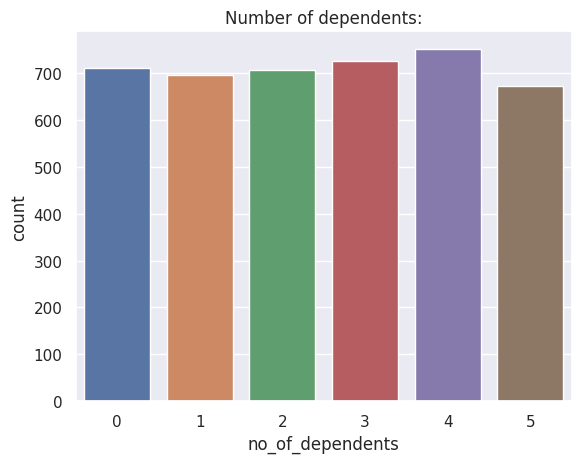

In [ ]:
sns.countplot(x = "no_of_dependents", data = df)
plt.title("Number of dependents:")

In [ ]:
dep_tab = pd.crosstab(columns = df["loan_status"], index = df["no_of_dependents"])
dep_tab["Total"] = dep_tab[" Approved"] + dep_tab[" Rejected"]
dep_tab["Approved%"] = (dep_tab[" Approved"] / dep_tab["Total"])*100
dep_tab["Rejected%"] = 100 - dep_tab["Approved%"]
dep_tab

loan_status        Approved   Rejected  Total  Approved%  Rejected%
no_of_dependents                                                   
0                       457        255    712  64.185393  35.814607
1                       430        267    697  61.692970  38.307030
2                       441        267    708  62.288136  37.711864
3                       457        270    727  62.861073  37.138927
4                       465        287    752  61.835106  38.164894
5                       406        267    673  60.326895  39.673105

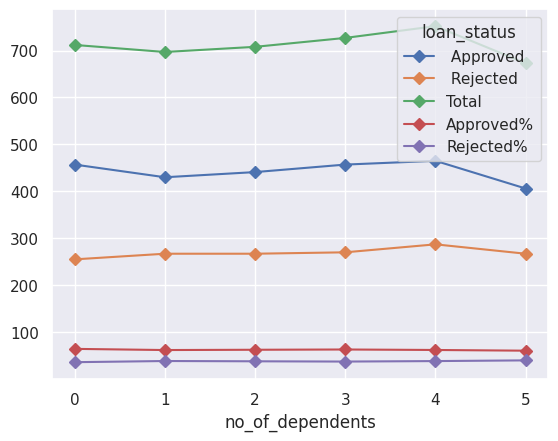

In [ ]:
dep_tab.plot.line(marker = "D")
plt.show()

In [ ]:
dep_tab1 = pd.crosstab(columns = df["loan_status"], index = df["no_of_dependents"])
ed_tab1 = pd.crosstab(columns = df["loan_status"], index = df["education"])
selfemp_tab1 = pd.crosstab(columns = df["loan_status"], index = df["self_employed"])

# Performing the chi-squared test:
chi_squared1, p_value1, dof1, expected1 = stats.chi2_contingency(dep_tab1)
chi_squared2, p_value2, dof2, expected2 = stats.chi2_contingency(ed_tab1)
chi_squared3, p_value3, dof3, expected3 = stats.chi2_contingency(selfemp_tab1)
print("P-value for number of dependents:", p_value1)
print("\nP-value for education:", p_value2)
print("\nP-value for self employed:", p_value3)

P-value for number of dependents: 0.7833787033887646

P-value for education: 0.7720042291016309

P-value for self employed: 1.0


Notes:

P values are > 0.05. So values are not significant.

#**Data Preparation:**

In [ ]:
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

##Converting categorical with dummies:

In [ ]:
dummy = pd.get_dummies(df)

In [ ]:
dummy.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  education_ Graduate  education_ Not Graduate  \
0           8000000                    1                        0   
1           3300000                    0                        1   
2          12800000                    1                        0   
3           7900000                    1                        0   
4           5000000                    0                        1   

   self_employed_ No  self_employed_ Yes  loan_status_ Approved  \
0                  1                   0                      1   
1                  0                   1                      0   
2                  1                   0                      0   
3                  1                   0                      0   
4                  0                   1                      0   

   loan_status_ Rejected  
0                      0  
1                      1  
2                      1  
3                      1  
4                      1

In [ ]:
dummy = dummy.drop(["education_ Not Graduate", "self_employed_ No", "loan_status_ Rejected"], axis = 1)
dummy.rename(columns = {"education_ Graduate" : "education", "self_employed_ Yes" : "self_employed", "loan_status_ Approved" : "loan_status"}, inplace = True)

In [ ]:
dummy.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  education  self_employed  loan_status  
0           8000000          1              0            1  
1           3300000          0              1            0  
2          12800000          1              0            0  
3           7900000          1              0            0  
4           5000000          0              1            0

<Axes: >

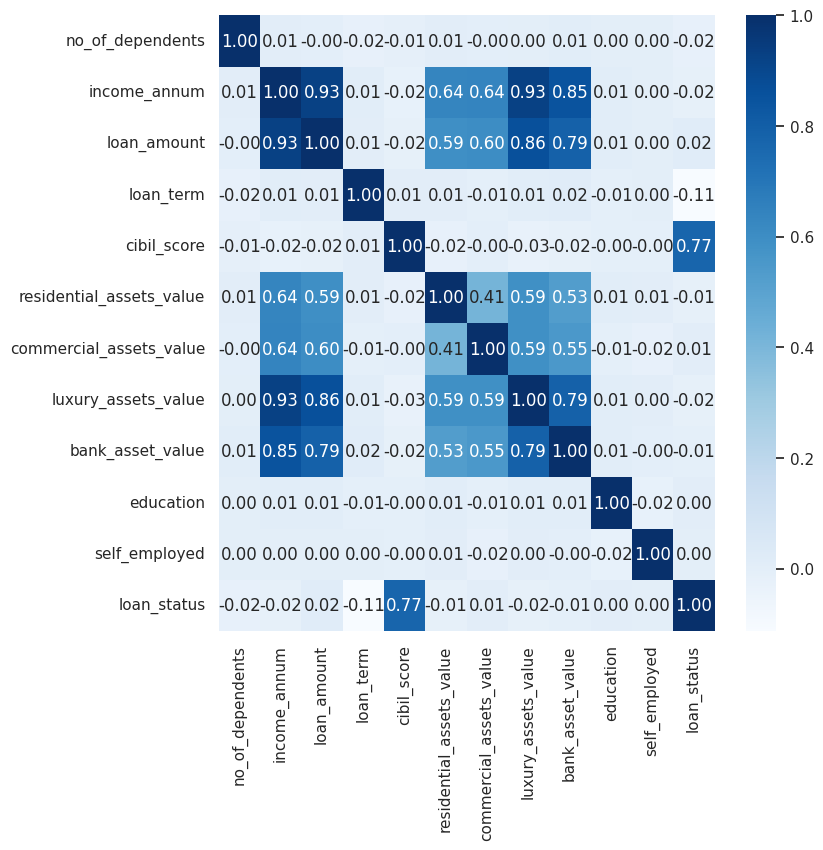

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(dummy.corr(), annot=True, fmt=".2f", cmap = "Blues")

Notes:
1. "cibil_score" affects loan_status the most.
2. "education" and "self_employed" has no linear relationship with any variable.


In [ ]:
dummy.columns.values

array(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value',
       'bank_asset_value', 'education', 'self_employed', 'loan_status'],
      dtype=object)

#**Training and testing data split:**

In [ ]:
y = dummy["loan_status"]
X = dummy.drop(["loan_status"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 11), (854, 11), (3415,), (854,))

##Scaling:

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Logistic regression:**

In [ ]:
reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
print("Training Accuracy = ", reg.score(X_train_scaled, y_train)*100, "%")

Training Accuracy =  92.03513909224012 %


##Testing:

In [ ]:
print("Testing Accuracy = ", reg.score(X_test_scaled, y_test)*100,"%")

Testing Accuracy =  90.5152224824356 %


In [ ]:
y_predicted = reg.predict(X_test_scaled)

##Scores:

In [ ]:
print("Accuracy = ", accuracy_score(y_predicted, y_test)*100, "%")
print("F1 score = ", f1_score(y_predicted, y_test)*100, "%")
print("Recall = ", recall_score(y_predicted, y_test)*100, "%")
print("Precision = ", precision_score(y_predicted, y_test)*100, "%")

Accuracy =  90.5152224824356 %
F1 score =  92.47910863509749 %
Recall =  92.05175600739372 %
Precision =  92.91044776119402 %


##Confusion matrix:

<Axes: >

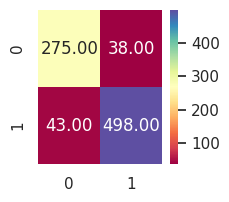

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".2f", cmap = "Spectral")

##Cross validation:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Performing k-fold cross-validation:
k = 5
scores = cross_val_score(reg, X_train_scaled, y_train, cv=k, scoring="accuracy")

#Printing the cross-validation scores:
print("Cross-validation scores:", scores)

#Calculating and printing the mean accuracy and its SD:
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")


Cross-validation scores: [0.90629575 0.91068814 0.93118594 0.91508053 0.92972182]
Mean Accuracy: 0.92
Standard Deviation: 0.01


#**SVM:**

In [ ]:
from sklearn.svm import SVC

#Creating an SVM classifier with a linear kernel:
svm_classifier = SVC(kernel="linear", C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9168618266978923
Precision: 0.9428571428571428
Recall: 0.9235074626865671
F1 Score: 0.9330819981149859


<Axes: >

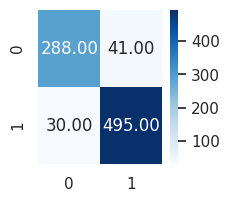

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm1, annot=True, fmt=".2f", cmap = "Blues")

#**Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_new = rf_classifier.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9168618266978923
Precision: 0.9428571428571428
Recall: 0.9235074626865671
F1 Score: 0.9330819981149859


<Axes: >

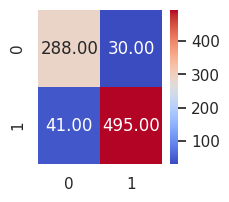

In [ ]:
plt.figure(figsize=(2,2))
sns.heatmap(cm2, annot=True, fmt=".2f", cmap = "coolwarm")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


In [ ]:
best_params, best_rf_model

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 RandomForestClassifier(n_estimators=300, random_state=42))

In [ ]:
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


In [ ]:
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
new_data_predictions = best_rf_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, new_data_predictions)
precision = precision_score(y_test, new_data_predictions)
recall = recall_score(y_test, new_data_predictions)
f1 = f1_score(y_test, new_data_predictions)
cm3 = confusion_matrix(y_test, new_data_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9800936768149883
Precision: 0.9796672828096118
Recall: 0.9888059701492538
F1 Score: 0.9842154131847725


<Axes: >

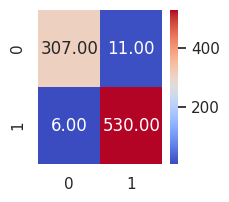

In [ ]:
plt.figure(figsize=(2,2))
sns.heatmap(cm3, annot=True, fmt=".2f", cmap = "coolwarm")